In [23]:
# Import necessary libraries
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical

In [2]:
dataset = mnist.load_data('mnist.db')

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 [==============================] - 33s 3us/step


In [3]:
train,test = dataset

In [4]:
len(train)

2

In [5]:
X_train,Y_train = train

In [6]:
X_test,Y_test = test

In [7]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train[0].ndim

2

In [13]:
img = X_train[1]

In [14]:
X_train = X_train.reshape(-1,28*28)
#X_train = X_train.reshape(-1, 1, 28*28)

In [16]:
X_train.shape

(60000, 784)

In [17]:
X_test = X_test.reshape(-1, 28*28)

In [18]:
X_test.shape

(10000, 784)

In [20]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
Y_train = to_categorical(Y_train)


In [26]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [27]:
model = Sequential()

In [28]:
model.add( 
    Dense(units = 512 , input_shape = (784,) , activation = 'relu' )
)
model.add( 
    Dense(units = 256 , activation = 'relu' )
)
model.add( 
    Dense(units = 128 , activation = 'relu' )
)
model.add( 
    Dense(units = 64 , activation = 'relu' )
)
model.add( 
    Dense(units = 10 , activation = 'softmax' )
)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(
    optimizer='adam',
    
    loss='categorical_crossentropy',
    
    metrics=['accuracy']
)

In [36]:
# Train the model
history = model.fit(X_train, Y_train, epochs=2, validation_split=0.2)

Epoch 1/2
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0409 - accuracy: 0.9917 - val_loss: 0.1670 - val_accuracy: 0.9724
Epoch 2/2
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0331 - accuracy: 0.9929 - val_loss: 0.2098 - val_accuracy: 0.9689


In [38]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, to_categorical(Y_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 0.1927 - accuracy: 0.9699
Test Accuracy: 96.99%


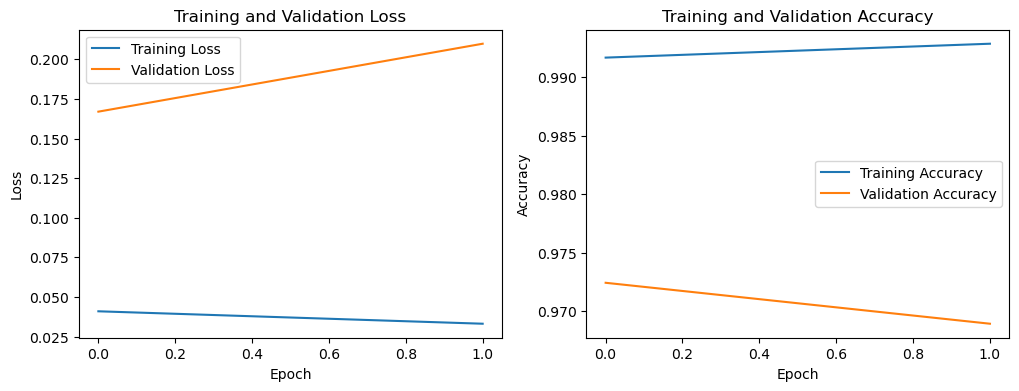

In [39]:

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


In [40]:
# Predict with the Model:
# Select multiple sample images from the test set (e.g., the first 10 images)
sample_images = X_test


In [41]:
# Use the trained model to make predictions on the selected images
predictions = model.predict(sample_images)

313/313 [==============================] - 7s 12ms/step


In [42]:
# Print the predictions
print(predictions)

[[0.00000000e+00 9.16284156e-23 1.47228686e-17 ... 1.00000000e+00
  1.16861548e-36 1.45522188e-11]
 [1.03780390e-20 7.29289846e-21 1.00000000e+00 ... 1.39884061e-15
  1.36775698e-21 9.60416996e-34]
 [3.74875222e-29 1.00000000e+00 6.07156174e-22 ... 1.07317163e-21
  2.64932186e-16 1.44115224e-25]
 ...
 [0.00000000e+00 0.00000000e+00 1.23029849e-29 ... 0.00000000e+00
  0.00000000e+00 4.24452920e-19]
 [6.76237316e-21 7.39196348e-29 6.91165567e-36 ... 1.12497605e-26
  1.71656011e-13 1.36384557e-19]
 [2.65137721e-11 1.86167881e-13 4.65999168e-33 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [43]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)



In [44]:
# Print the predicted labels
print("Predicted Labels:", predicted_labels)



Predicted Labels: [7 2 1 ... 4 5 6]


In [46]:
# Generate a confusion matrix and classification report
y_true = Y_test
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
confusion = confusion_matrix(y_true, y_pred_labels)
classification_report_str = classification_report(y_true, y_pred_labels)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report_str)

313/313 [==============================] - 3s 9ms/step
Confusion Matrix:
 [[ 975    0    1    1    0    1    0    0    2    0]
 [   0 1111    3    1    0    0    1    0   18    1]
 [   5    0 1011    1    3    0    0    4    7    1]
 [   1    0    0  992    0    3    0    3    9    2]
 [   2    6    7    0  937    2    2    3    0   23]
 [   4    0    0   15    0  857    0    2   10    4]
 [   9    2    1    0    3   42  889    0   12    0]
 [   1    2   11    4    1    0    0  988    5   16]
 [   5    0    1    2    1    0    0    4  956    5]
 [   3    2    0    8    5    3    0    2    3  983]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.95      0.97       982
           5       0.94      0.96      0.95   

313/313 [==============================] - 4s 11ms/step


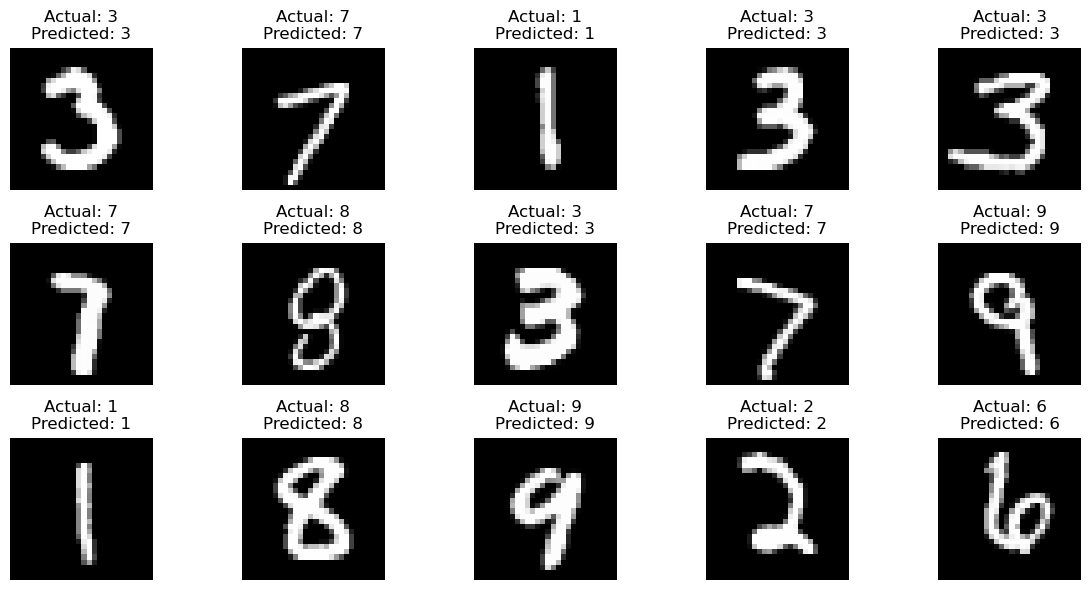

In [48]:

# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Select some random test samples (e.g., the first 15)
num_samples_to_display = 15
sample_indices = np.random.choice(len(X_test), num_samples_to_display, replace=False)

# Create a figure to display the comparison
plt.figure(figsize=(12, 6))

for i, sample_index in enumerate(sample_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {Y_test[sample_index]}\nPredicted: {predicted_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

